In [1]:
## importing libraries

!pip install keras==3.4.1

import tensorflow as tf
import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# Import libraries

import tensorflow as tf
import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import os
import random
import shutil
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
print(tfk.__version__)


# Set seed for reproducibility

seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
2.16.1
3.4.1


In [2]:
# Load trained models

model1  = tfk.models.load_model('/kaggle/input/myke0.93/keras/default/1/myke0.93.keras')
model2  = tfk.models.load_model('/kaggle/input/0.95_toky/keras/default/1/0.95_toky.keras')
model3 = tfk.models.load_model("/kaggle/input/0.94toky/keras/default/1/model_best_FT.keras")
model4 = tfk.models.load_model("/kaggle/input/0.94_large/keras/default/1/0.94_large.keras")
model5 = tfk.models.load_model("/kaggle/input/0.95toky_2/keras/default/1/0.95toky_2.keras")
model6 = tfk.models.load_model("/kaggle/input/myke_final_v2/keras/default/1/final_myke_FT_V2M.keras")
model7 = tfk.models.load_model("/kaggle/input/convnextlarge/keras/default/1/convnextlarge.keras")


In [3]:
from tensorflow.keras.models import Model

def change_model_name(model, name):
    # Get the original model's configuration
    config = model.get_config()
    
    # Modify the name in the configuration
    config['name'] = name
    
    # Recreate the model with the modified configuration
    new_model = Model.from_config(config)
    
    # Copy the weights from the original model to the new model
    new_model.set_weights(model.get_weights())
    return new_model


In [4]:
# Change the name of the models to avoid conflicts

model1 = change_model_name(model1, "model1")
model2 = change_model_name(model2, "model2")
model3 = change_model_name(model3, "model3")
model4 = change_model_name(model4, "model4")
model5 = change_model_name(model5, "model5")
model6 = change_model_name(model6, "model6")
model7 = change_model_name(model7, "model7")

In [5]:
model1,model2,model3,model4,model5,model6,model7

(<Functional name=model1, built=True>,
 <Functional name=model2, built=True>,
 <Functional name=model3, built=True>,
 <Functional name=model4, built=True>,
 <Functional name=model5, built=True>,
 <Functional name=model6, built=True>,
 <Functional name=model7, built=True>)

In [6]:
def ensembleModels(models, model_input):
    yModels = [model(model_input) for model in models]
    yModels_list = []
    yModels_list.append(yModels[0][0])
    yModels_list.append(yModels[1][0])
    yModels_list.append(yModels[2][0])
    yModels_list.append(yModels[3][0])
    yModels_list.append(yModels[4][0])
    yModels_list.append(yModels[5][0])
    yModels_list.append(yModels[6][0])
    yAvg=tfkl.average(yModels_list)                                             
    modelEns = tfk.models.Model(inputs=model_input, outputs=yAvg, name='ensemble')

    return modelEns

In [7]:
models = [model1,model2,model3,model4,model5,model6,model7]

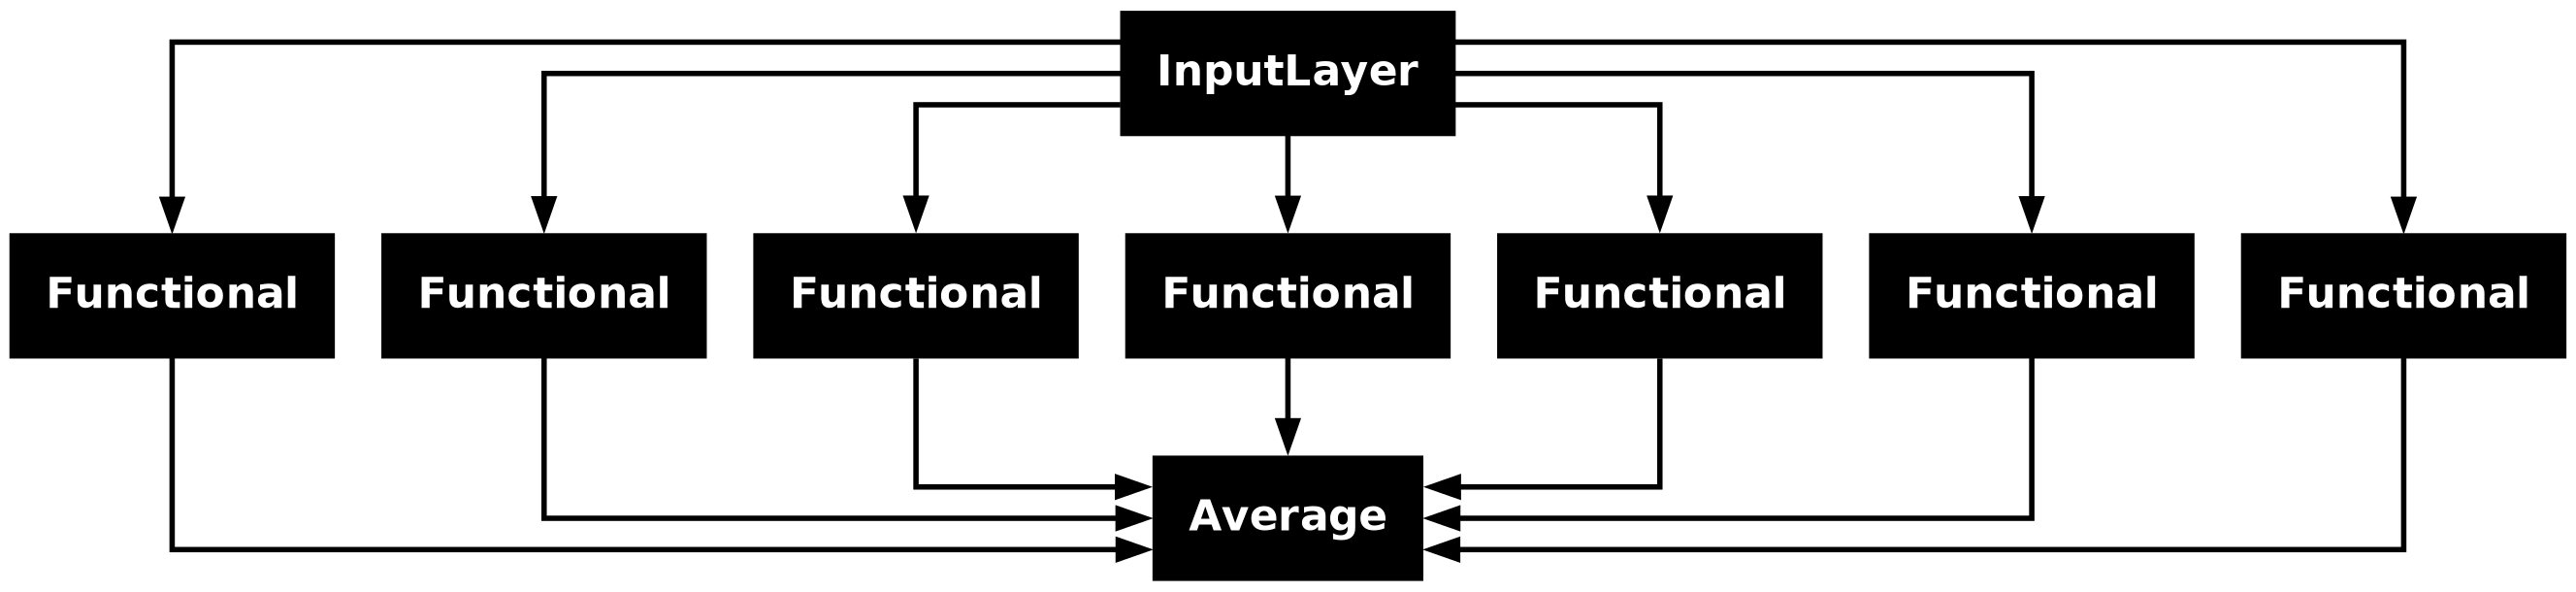

In [8]:
# Create the ensemble model made of 6 EfficientNet models of different sizes 
# and one ConvNextLarge model, all pre-trained on ImageNet with different settings 

model_input = tfkl.Input(shape=models[0].input_shape[1:]) # c*h*w
modelEns = ensembleModels(models, model_input)
     

tfk.utils.plot_model(modelEns)

In [9]:
modelEns.summary()

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model1 (Functional) │ (None, 8)         │ 20,341,608 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model2 (Functional) │ (None, 8)         │ 53,480,380 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model3 (Functional) │ (None, 8)         │ 20,661,352 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model4 (Functional) │ (None, 8)         │ 118,076,8… │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model5 (Functional) │ (None, 8)         │ 53,480,380 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model6 (Functional) │ (None, 8)         │ 53,160,636 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model7 (Functional) │ (None, 8)         │ 196,625,8… │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average (Average)   │ (None, 8)         │          0 │ model1[0][0],     │
│                     │                   │            │ model2[0][0],     │
│                     │                   │            │ model3[0][0],     │
│                     │                   │            │ model4[0][0],     │
│                     │                   │            │ model5[0][0],     │
│                     │                   │            │ model6[0][0],     │
│                     │                   │            │ model7[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 515,827,060 (1.92 GB)

 Trainable params: 451,039,040 (1.68 GB)

 Non-trainable params: 64,788,020 (247.15 MB)

In [10]:
# Save model
modelEns.save("EnsambleEfficientNet.keras")

In [ ]:
# Load data to test the model

data_path = "/kaggle/input/clean-data/cleaned_training_set.npz"
data = np.load(data_path)

# Assume the file contains keys 'images' and 'labels'
images = data['images']
labels = data['labels']


# Split dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=33)

y_train = tfk.utils.to_categorical(y_train, num_classes=8)
y_val = tfk.utils.to_categorical(y_val, num_classes=8)

In [ ]:
# Python file script to submit the model on Codabench platform for evaluation

%%writefile model.py
import numpy as np

import tensorflow as tf
import keras as tfk
from keras.saving import register_keras_serializable
from keras import layers as tfkl

import numpy as np


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.
        """
        self.neural_network = tfk_models.load_model('EnsambleEfficientNet.keras')

    def tta_prediction(self, image: np.ndarray) -> np.ndarray:
        """
        Perform Test-Time Augmentation (TTA) and predict using the neural network.

        Args:
            image (np.ndarray): A single image of shape (96, 96, 3).

        Returns:
            np.ndarray: The predicted label for the image.
        """
        def add_noise(img):
            noise = np.random.normal(0, 0.1 * 255, img.shape)  # Gaussian noise
            return np.clip(img + noise, 0, 255).astype(np.uint8)

        def rotate(img, k):
            return np.rot90(img, k=k)  # Rotate by 90 degrees k times

        def channel_shuffle(img):
            return img[..., np.random.permutation(3)]  # Shuffle color channels

        images = [
            image,  # Original
            np.flip(image, axis=1),  # Horizontal flip
            np.flip(image, axis=0),  # Vertical flip
            rotate(image, 1),  # Rotate 90 degrees
            rotate(image, 2),  # Rotate 180 degrees
            rotate(image, 3),  # Rotate 270 degrees
            np.roll(image, -9, axis=0),  # Roll up
            np.roll(image, -9, axis=1),  # Roll left
            np.roll(image, 9, axis=0),  # Roll down
            np.roll(image, 9, axis=1),  # Roll right
            add_noise(image),  # Gaussian noise
            channel_shuffle(image),  # Channel shuffle
        ]

        # Preprocess and predict for each augmented version
        preds = [
            self.neural_network.predict(
                np.expand_dims(efficientnet.preprocess_input(img), axis=0), verbose=0
            )
            for img in images
        ]

        # Aggregate predictions and find the class with the highest sum
        sums = tf.reduce_sum(tf.stack(preds), axis=0)
        tta_pred = tf.squeeze(tf.argmax(sums, axis=-1)).numpy()
        return tta_pred

    def predict(self, X):
        """
        Predict the labels corresponding to the input X.

        Args:
            X (np.ndarray): Input data of shape (n_samples, 96, 96, 3).

        Returns:
            np.ndarray: Predicted labels of shape (n_samples,).
        """
        predictions = [self.tta_prediction(image) for image in X]
        return np.array(predictions)


Writing model.py


In [ ]:
# Zip the model and the Python script for submission

from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py EnsambleEfficientNet.keras

from IPython.display import FileLink
FileLink(filename)

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: model.py (deflated 62%)
  adding: EnsambleEfficientNet.keras (deflated 8%)


/kaggle/working/submission_241124_212529.zip

TRAIN:


I0000 00:00:1732483674.078670      71 service.cc:145] XLA service 0x7d0be8002d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732483674.078737      71 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1732483735.073519      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/38 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step
Accuracy score over the train set: 0.9908
Precision score over the train set: 0.9908
Recall score over the train set: 0.9908
F1 score over the train set: 0.9908


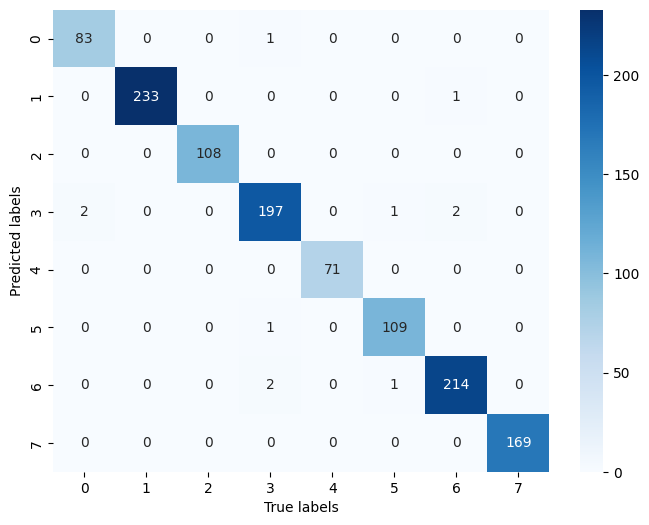

VALIDATION:
Accuracy score over the validation set: 0.9908
Precision score over the validation set: 0.9908
Recall score over the validation set: 0.9908
F1 score over the validation set: 0.9908


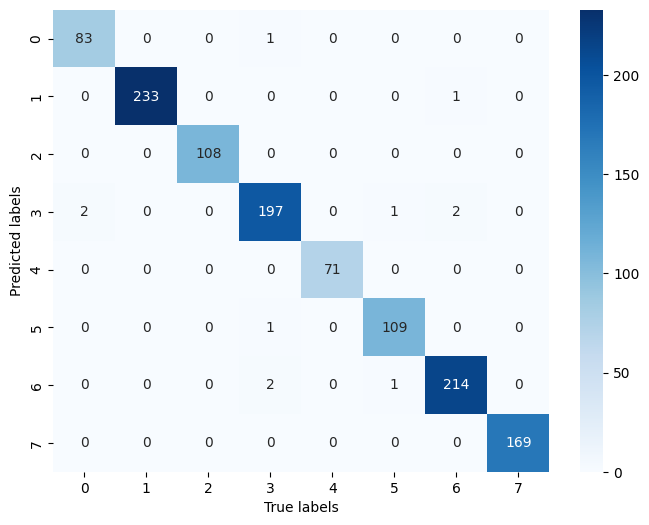

In [ ]:
# Confusion matrix and metrics for the ensemble model

ft_model = modelEns

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split


print("TRAIN:")
# Predict class probabilities and get predicted classes
train_predictions = ft_model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=-1)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='',   cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

print("VALIDATION:")
# Predict class probabilities and get predicted classes
val_predictions = ft_model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='',   cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()